In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [186]:
df = pd.read_csv('/content/uber_stock_data.csv')


In [187]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500
...,...,...,...,...,...,...,...
1439,2025-01-30,66.589996,66.589996,67.222000,63.419998,63.419998,33246500
1440,2025-01-31,66.849998,66.849998,67.870003,66.333000,67.089996,19805600
1441,2025-02-03,67.290001,67.290001,68.849998,65.178001,65.300003,25290000
1442,2025-02-04,69.750000,69.750000,70.190002,67.690002,67.690002,33786200


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1444 non-null   object 
 1   Adj Close  1444 non-null   float64
 2   Close      1444 non-null   float64
 3   High       1444 non-null   float64
 4   Low        1444 non-null   float64
 5   Open       1444 non-null   float64
 6   Volume     1444 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB


In [189]:
df.isnull()

,Date,Adj Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1439,False,False,False,False,False,False,False
1440,False,False,False,False,False,False,False
1441,False,False,False,False,False,False,False
1442,False,False,False,False,False,False,False


In [190]:
df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [191]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [192]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1.444000e+03
mean,44.465374,44.465374,45.287511,43.643301,44.493022,2.429800e+07
std,15.594262,15.594262,15.740825,15.482652,15.643967,1.774084e+07
min,14.820000,14.820000,17.799999,13.710000,15.960000,3.380000e+06
25%,31.930000,31.930000,32.653749,31.181250,31.867499,1.498905e+07
50%,41.355001,41.355001,41.910000,40.518499,41.215000,2.036965e+07
75%,54.719999,54.719999,55.635001,53.597502,54.664999,2.843280e+07
max,86.339996,86.339996,87.000000,84.180000,85.639999,3.642318e+08


In [193]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1439,False
1440,False
1441,False
1442,False


In [194]:
df.duplicated().sum()

0

# Convert date column to datetime

In [195]:
df['Date'] = pd.to_datetime(df['Date'])

In [196]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1444 non-null   datetime64[ns]
 1   Adj Close  1444 non-null   float64       
 2   Close      1444 non-null   float64       
 3   High       1444 non-null   float64       
 4   Low        1444 non-null   float64       
 5   Open       1444 non-null   float64       
 6   Volume     1444 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 79.1 KB


# EXPLORATORY DATA ANALYSIS

In [197]:
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [198]:
corr_matrix,mask

(           Adj Close     Close      High       Low      Open    Volume
 Adj Close   1.000000  1.000000  0.998990  0.998969  0.997606 -0.171254
 Close       1.000000  1.000000  0.998990  0.998969  0.997606 -0.171254
 High        0.998990  0.998990  1.000000  0.998732  0.998944 -0.160054
 Low         0.998969  0.998969  0.998732  1.000000  0.998795 -0.183612
 Open        0.997606  0.997606  0.998944  0.998795  1.000000 -0.172961
 Volume     -0.171254 -0.171254 -0.160054 -0.183612 -0.172961  1.000000,
 array([[ True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True],
        [False, False,  True,  True,  True,  True],
        [False, False, False,  True,  True,  True],
        [False, False, False, False,  True,  True],
        [False, False, False, False, False,  True]]))

#Correlation Heatmap

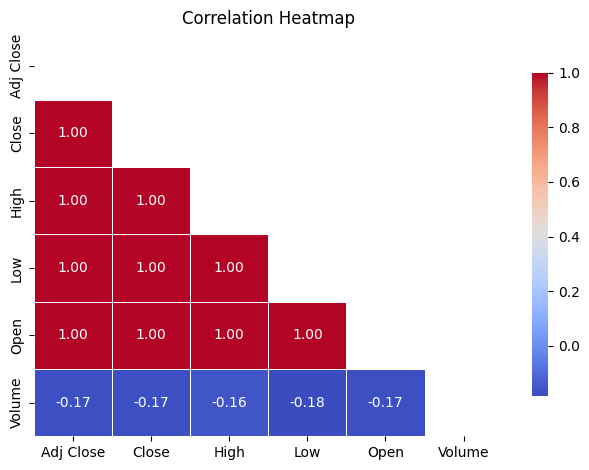

In [199]:
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [200]:
df.dropna(subset=['Date'], inplace=True)  # Remove rows with invalid dates
df.sort_values('Date', inplace=True)

In [201]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500


# Uber Stock Closing Prices Over Time

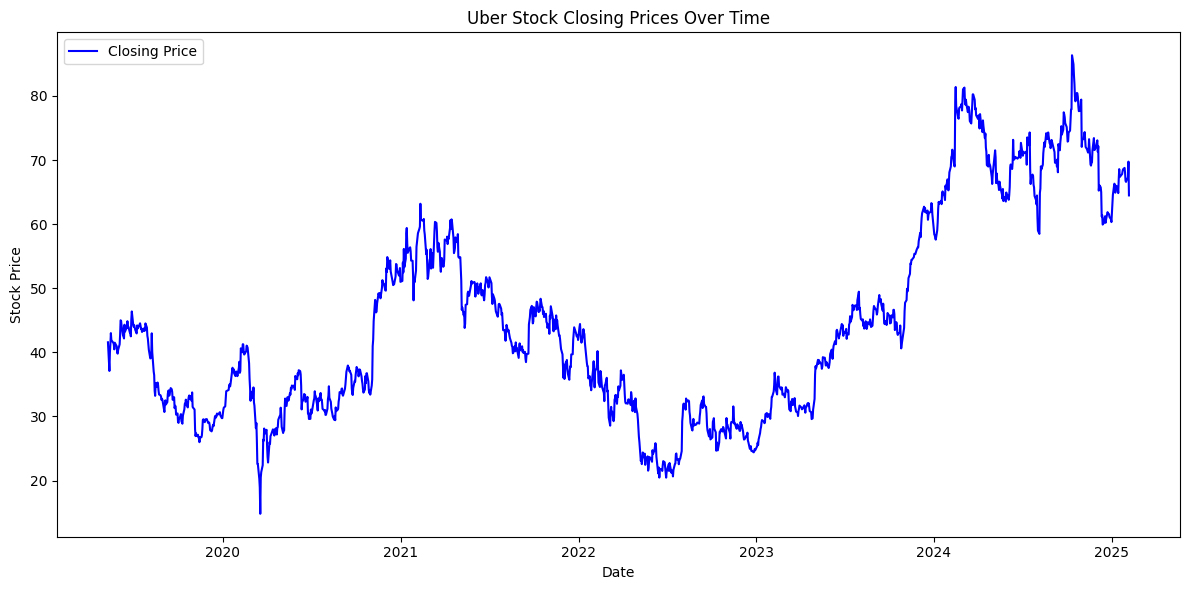

In [202]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='b')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Uber Stock Closing Prices Over Time")
plt.legend()
plt.tight_layout()
plt.show()

# Stock Price with 30-day Moving Average

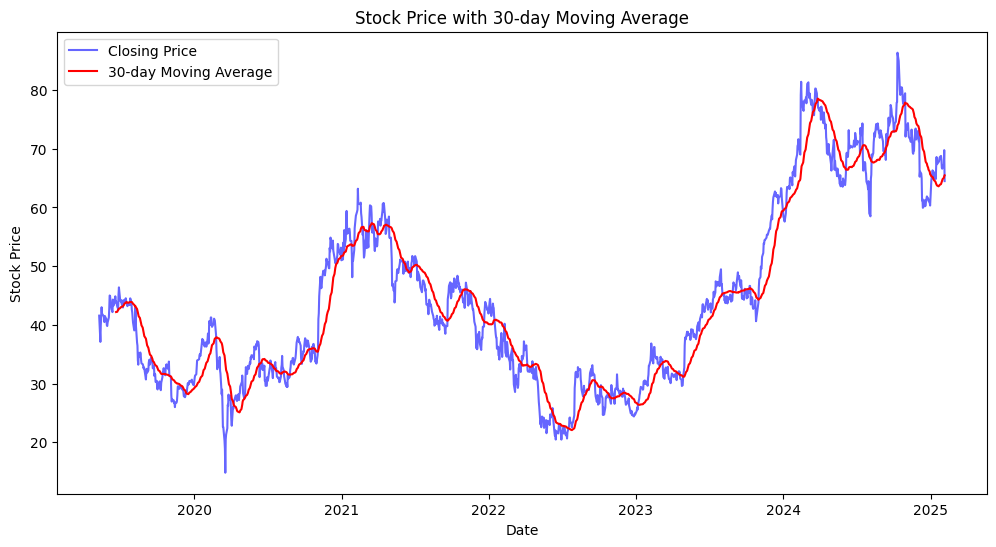

In [203]:
df['Moving_Avg'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['Moving_Avg'], label='30-day Moving Average', color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price with 30-day Moving Average")
plt.legend()
plt.show()


# Uber Stock Trading Volume Over Time

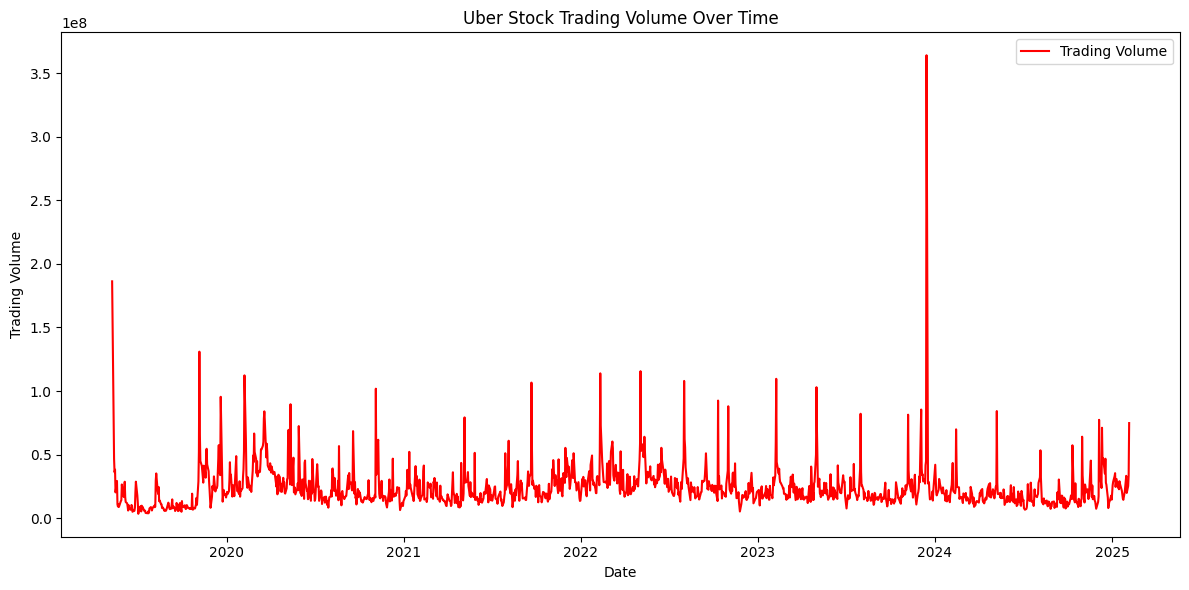

In [204]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Trading Volume', color='RED')
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Uber Stock Trading Volume Over Time")
plt.legend()
plt.tight_layout()
plt.show()


# Distribution of Uber Stock Trading Volume

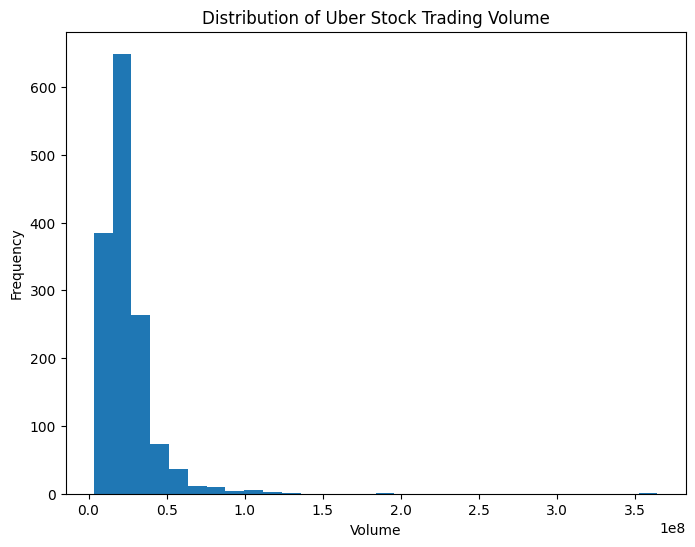

In [205]:
plt.figure(figsize=(8, 6))
plt.hist(df['Volume'], bins=30)
plt.title('Distribution of Uber Stock Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

# Relationship Between Volume and Closing Price

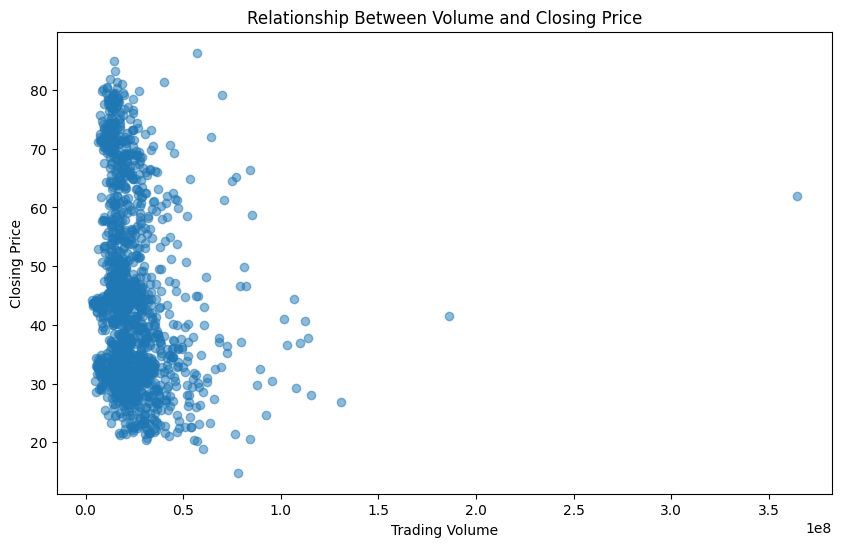

In [206]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)  # alpha for transparency
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price')
plt.title('Relationship Between Volume and Closing Price')
plt.show()

# Calculate daily price change percentage

In [207]:
df['Daily_Change'] = df['Close'].pct_change() * 100

In [208]:
df['Daily_Change']

,Daily_Change
0,NaN
1,-10.752950
2,7.708897
3,3.328333
4,4.141436
...,...
1439,-0.239706
1440,0.390452
1441,0.658194
1442,3.655817


# daily price change

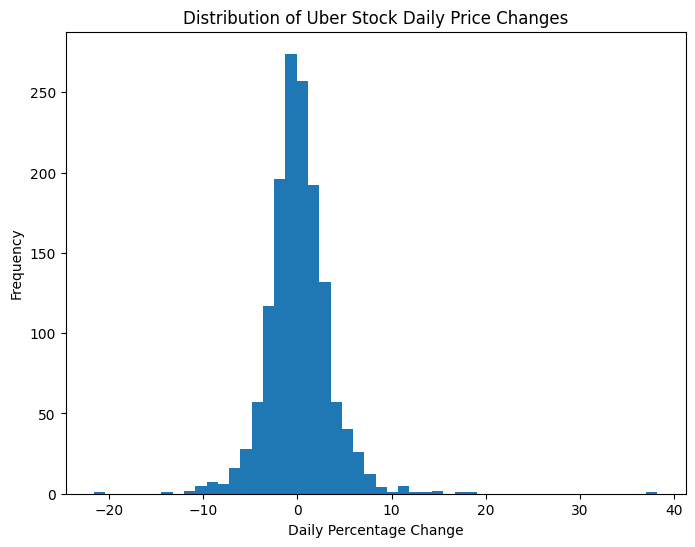

In [209]:
plt.figure(figsize=(8, 6))
plt.hist(df['Daily_Change'].dropna(), bins=50)  # Drop NaN values from pct_change
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Uber Stock Daily Price Changes')
plt.show()

# Relationship between Opening and Closing Prices

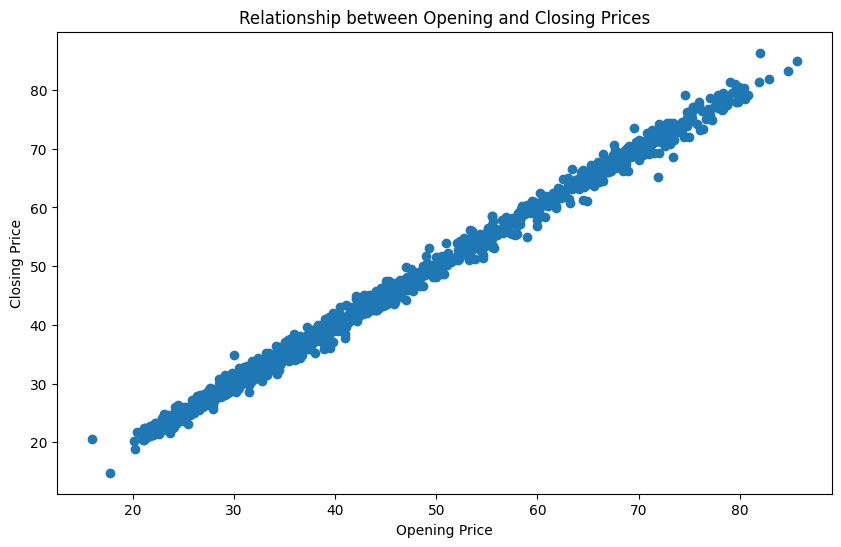

In [210]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'])
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.title('Relationship between Opening and Closing Prices')
plt.show()


# PREDICTIVE MODEL

In [211]:
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['Days', 'Volume', 'Open', 'High', 'Low']]
y = df['Close']
X = X.dropna()
y = y[X.index]

In [212]:
df['Date'],df['Days'],X,y

(0      2019-05-10
 1      2019-05-13
 2      2019-05-14
 3      2019-05-15
 4      2019-05-16
           ...    
 1439   2025-01-30
 1440   2025-01-31
 1441   2025-02-03
 1442   2025-02-04
 1443   2025-02-05
 Name: Date, Length: 1444, dtype: datetime64[ns],
 0          0
 1          3
 2          4
 3          5
 4          6
         ... 
 1439    2092
 1440    2093
 1441    2096
 1442    2097
 1443    2098
 Name: Days, Length: 1444, dtype: int64,
       Days     Volume       Open       High        Low
 0        0  186322500  42.000000  45.000000  41.060001
 1        3   79442400  38.790001  39.240002  36.080002
 2        4   46661100  38.310001  39.959999  36.849998
 3        5   36086100  39.369999  41.880001  38.950001
 4        6   38115500  41.480000  44.060001  41.250000
 ...    ...        ...        ...        ...        ...
 1439  2092   33246500  63.419998  67.222000  63.419998
 1440  2093   19805600  67.089996  67.870003  66.333000
 1441  2096   25290000  65.300003  68.8499

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
X_train, X_test, y_train, y_test

(      Days    Volume       Open       High        Low
 1429  2077  22704800  66.010002  67.245003  66.010002
 353    511  20123400  36.000000  37.990002  35.939999
 1089  1581  14972200  45.500000  46.680000  45.250000
 915   1327  15258600  24.290001  24.700001  23.900000
 682    990  49261600  34.910000  36.419998  33.509998
 ...    ...       ...        ...        ...        ...
 1095  1589  16125700  48.189999  48.490002  47.270000
 1130  1638  21946800  46.919998  48.150002  46.630001
 1294  1880  14319000  71.250000  71.260002  68.879997
 860   1246  19690200  28.830000  28.860001  27.920000
 1126  1634  21292700  42.009998  43.000000  42.009998
 
 [1155 rows x 5 columns],
       Days    Volume       Open       High        Low
 413    599  10140600  52.330002  52.990002  51.470001
 316    459  31569900  31.660000  32.209999  30.650000
 1034  1502  19931300  42.770000  43.470001  42.020000
 65      95  18990600  37.000000  37.459999  36.119999
 1024  1487  24218600  39.500000  40.

# Training model

In [215]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [216]:
y_pred = model.predict(X_test)

In [217]:
y_pred

array([52.20283625, 31.3216376 , 42.74670654, 36.70079079, 40.5253329 ,
       42.59056948, 37.27760843, 30.75936364, 37.80230949, 27.62242473,
       38.57960392, 31.80286729, 44.87626955, 69.58407414, 37.71858262,
       46.17642711, 50.43534163, 31.4401028 , 20.60075086, 30.67120951,
       28.09875566, 28.75478803, 53.28209566, 66.74044853, 31.11454474,
       26.91483381, 40.23708811, 71.72825755, 43.77394558, 38.97619788,
       34.80780105, 33.50488823, 31.2997231 , 40.74509051, 62.99393548,
       45.22129395, 43.45258547, 58.87335736, 78.30676181, 43.72806796,
       40.71161307, 26.0627216 , 67.89066379, 47.09830802, 40.24381416,
       36.10932449, 33.34035293, 63.4446792 , 50.8387871 , 23.95176505,
       65.15238384, 33.51447434, 78.52221897, 34.34458121, 28.96032829,
       30.67226448, 73.74349749, 45.7720818 , 31.84898621, 39.65209312,
       37.29173762, 34.89696112, 30.24810753, 29.65853215, 32.86737577,
       32.2100242 , 75.19056116, 44.43008841, 21.32776284, 43.48

# Model Evaluate

In [218]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Mean Squared Error: 0.26042888546336596
Model Coefficients: [-8.23253963e-06 -1.87108175e-09 -5.82862871e-01  8.40266895e-01
  7.41079850e-01]
Model Intercept: 0.05883156331948669


# Actual vs. Predicted Closing Prices

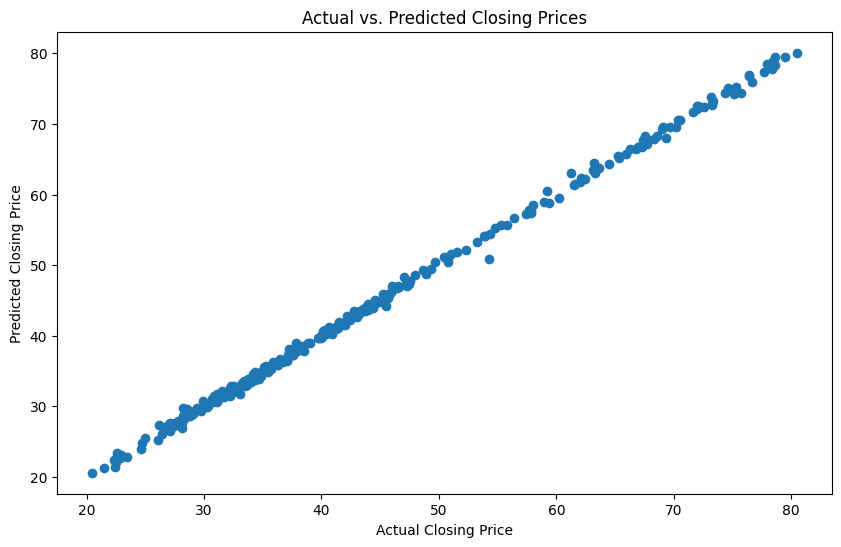

In [219]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.show()